# Time-Series-Forecasting By LSTM_Google_Open_Stock

# Importing the Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data Set

In [16]:
import io
%cd "C:\Users\sande\OneDrive\Desktop\New folder (2)"

C:\Users\sande\OneDrive\Desktop\New folder (2)


In [17]:
df=pd.read_csv('GOOG.csv')

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-08-31,271.352905,272.130005,266.999207,269.469971,269.469971,5406790
1,2011-09-01,269.365356,270.899597,264.618134,265.255768,265.255768,4849108
2,2011-09-02,261.255737,262.974304,259.392731,261.440063,261.440063,4820401
3,2011-09-06,254.446274,260.403931,254.296829,260.115021,260.115021,5451959
4,2011-09-07,264.234589,266.969330,262.715271,266.017914,266.017914,5532259


In [19]:
dfopen=df.reset_index()['Open']

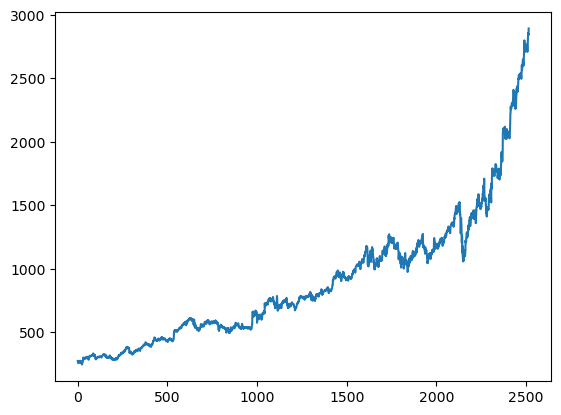

In [20]:
plt.plot(dfopen)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dfopen=scaler.fit_transform(np.array(dfopen).reshape(-1,1))
dfopen

array([[0.01028413],
       [0.00953411],
       [0.00647387],
       ...,
       [0.98425656],
       [0.98043763],
       [1.        ]])

In [22]:
training_size=int(len(dfopen)*0.65)
test_size=len(dfopen)-training_size
train_data,test_data=dfopen[0:training_size,:],dfopen[training_size:len(dfopen),:1]

In [23]:
training_size,test_size

(1635, 881)

# convert an array of values into a dataset matrix

In [24]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [25]:
time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(1434, 200)
(1434,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(680, 200)
(680,)


(None, None)

# reshape input to be [samples, time steps, features] which is required for LSTM

In [28]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create the Stacked LSTM model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,activation="relu",return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,activation="relu",return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 200, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 16s 425ms/step - loss: 0.0066 - val_loss: 0.0278
Epoch 2/100
23/23 [==============================] - 8s 370ms/step - loss: 6.2540e-04 - val_loss: 0.0054
Epoch 3/100
23/23 [==============================] - 9s 383ms/step - loss: 1.1531e-04 - val_loss: 0.0059
Epoch 4/100
23/23 [==============================] - 9s 382ms/step - loss: 9.7135e-05 - val_loss: 0.0046
Epoch 5/100
23/23 [==============================] - 9s 383ms/step - loss: 8.9557e-05 - val_loss: 0.0039
Epoch 6/100
23/23 [==============================] - 9s 384ms/step - loss: 8.7806e-05 - val_loss: 0.0047
Epoch 7/100
23/23 [==============================] - 9s 387ms/step - loss: 9.2386e-05 - val_loss: 0.0027
Epoch 8/100
23/23 [==============================] - 9s 375ms/step - loss: 9.0461e-05 - val_loss: 0.0028
Epoch 9/100
23/23 [==============================] - 9s 375ms/step - loss: 8.7617e-05 - val_loss: 0.0038
Epoch 10/100
23/23 [==============================] - 9s 3

Epoch 77/100
23/23 [==============================] - 9s 413ms/step - loss: 4.7967e-05 - val_loss: 4.5415e-04
Epoch 78/100
23/23 [==============================] - 9s 385ms/step - loss: 4.7242e-05 - val_loss: 3.4862e-04
Epoch 79/100
23/23 [==============================] - 9s 385ms/step - loss: 5.6165e-05 - val_loss: 4.0801e-04
Epoch 80/100
23/23 [==============================] - 9s 386ms/step - loss: 5.0523e-05 - val_loss: 8.9456e-04
Epoch 81/100
23/23 [==============================] - 9s 380ms/step - loss: 4.5400e-05 - val_loss: 3.6221e-04
Epoch 82/100
23/23 [==============================] - 9s 395ms/step - loss: 4.2524e-05 - val_loss: 7.7352e-04
Epoch 83/100
23/23 [==============================] - 8s 368ms/step - loss: 5.4165e-05 - val_loss: 3.6980e-04
Epoch 84/100
23/23 [==============================] - 9s 385ms/step - loss: 5.5518e-05 - val_loss: 0.0011
Epoch 85/100
23/23 [==============================] - 8s 364ms/step - loss: 4.7122e-05 - val_loss: 3.0564e-04
Epoch 86/100
2

In [33]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

22/22 [==============================] - 2s 76ms/step


# Transformback to original form

In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics

In [35]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

664.4928360404714

# Test Data RMSE

In [36]:
math.sqrt(mean_squared_error(ytest,test_predict))

1578.7516271878785

# Plotting 

# shift train predictions for plotting

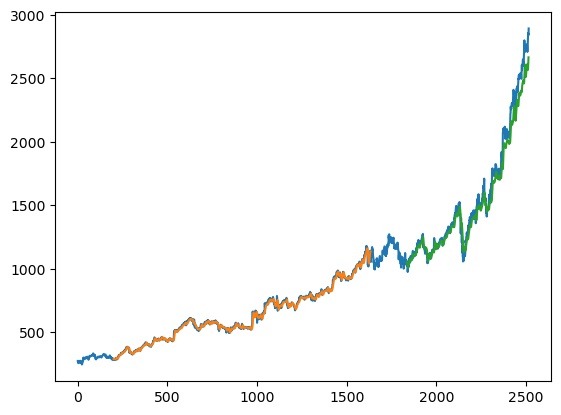

In [37]:
trainPredictPlot = np.empty_like(dfopen)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dfopen)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(dfopen)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dfopen))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

881

In [39]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape

(1, 200)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.5673719269033507,
 0.5711455259977437,
 0.5764549595461196,
 0.5784323216979824,
 0.5740134518754847,
 0.5638813477410373,
 0.5740058975074576,
 0.5681153149815088,
 0.5609077497678561,
 0.5769040419893865,
 0.5769794954806388,
 0.580033844323481,
 0.5774625271081585,
 0.5864172705893147,
 0.5961946786731238,
 0.5963871360005369,
 0.5943041017532339,
 0.5909455895025862,
 0.5916663597598523,
 0.575738012699456,
 0.5731946106834341,
 0.5777002657379048,
 0.573707814499873,
 0.576900264616693,
 0.5752512036992428,
 0.5698436528008137,
 0.5544964086800814,
 0.5623907945893876,
 0.5600058539238975,
 0.5626058693603329,
 0.5688832552274546,
 0.5825267136966699,
 0.5727983642878873,
 0.5627643771261334,
 0.5711115764361311,
 0.55883227026594,
 0.5503907309785824,
 0.5645153327663304,
 0.5825983898152287,
 0.5818776195579627,
 0.5697455354507603,
 0.5639568012322895,
 0.569632308987293,
 0.5638096252072096,
 0.5691153277981608,
 0.599005991507811,
 0.6241155345989383,
 0.6232400799864742,
